# The Best Optimization Technique for Your Trading Strategy:
## A Data-Driven Comparative Analysis

This notebook analyzes the performance of different optimization strategies used to tune trading strategy parameters. Each method's summary results are stored in individual CSV files under the `optimizers` folder. We will:

- Aggregate the results for all strategies
- Compare key performance metrics such as returns, final portfolio values, and run times
- Visualize these metrics with clear, publication-ready plots
- Narrate insights that highlight the strengths and weaknesses of each approach

In [72]:
# Imports and Setup
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set matplotlib dark style globally
plt.style.use('dark_background')

In [73]:
# Load all strategy summary CSVs from optimizer subfolders

base_dir = "optimizers"
strategy_results = []

for strategy_name in os.listdir(base_dir):
    strategy_path = os.path.join(base_dir, strategy_name, "strategy_summary.csv")
    if os.path.isfile(strategy_path):
        df = pd.read_csv(strategy_path)
        df['Strategy'] = strategy_name
        strategy_results.append(df)

# Combine into one DataFrame
combined_df = pd.concat(strategy_results, ignore_index=True)

# Pivot for easier metric-wise comparison
pivot_df = combined_df.pivot(index='Metric', columns='Strategy', values='Value')
pivot_df = pivot_df.apply(pd.to_numeric, errors='ignore')
pivot_df

C:\Users\Brian\AppData\Local\Temp\ipykernel_6292\3393845664.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  pivot_df = pivot_df.apply(pd.to_numeric, errors='ignore')


Strategy,bayesian_optimization,genetic_algorithm,grid_search,random_search
Metric,,,,
Average Time per Run (seconds),4.160895,2.556833,61.948953,0.233810
Buy & Hold Return (%),82.833244,82.833244,82.833244,82.833244
Final Buy & Hold Value (Test),18.283324,18.283324,18.283324,18.283324
Final Strategy Value (Test),18.453874,18.453874,16.636883,17.210539
Number of Trades (Test),3.000000,3.000000,11.000000,13.000000
Optimized Long MA Window,166.000000,166.000000,164.000000,163.000000
Optimized Short MA Window,46.000000,46.000000,161.000000,161.000000
Strategy Return (%),84.538742,84.538742,66.368830,72.105390


### Summary Table of Key Metrics

Below is the table showing key metrics such as:

- Optimized Short and Long MA windows
- Final portfolio value on test set
- Buy & Hold final value for baseline comparison
- Strategy and Buy & Hold returns (%)
- Number of trades executed
- Average runtime per run (seconds)

This gives us a comprehensive quantitative snapshot of each optimization method.

In [74]:
# Select key metrics for display
metrics_of_interest = [
    "Optimized Short MA Window",
    "Optimized Long MA Window",
    "Final Strategy Value (Test)",
    "Final Buy & Hold Value (Test)",
    "Strategy Return (%)",
    "Buy & Hold Return (%)",
    "Number of Trades (Test)",
    "Average Time per Run (seconds)"
]

# Filter pivot table
summary_metrics = pivot_df.loc[metrics_of_interest]

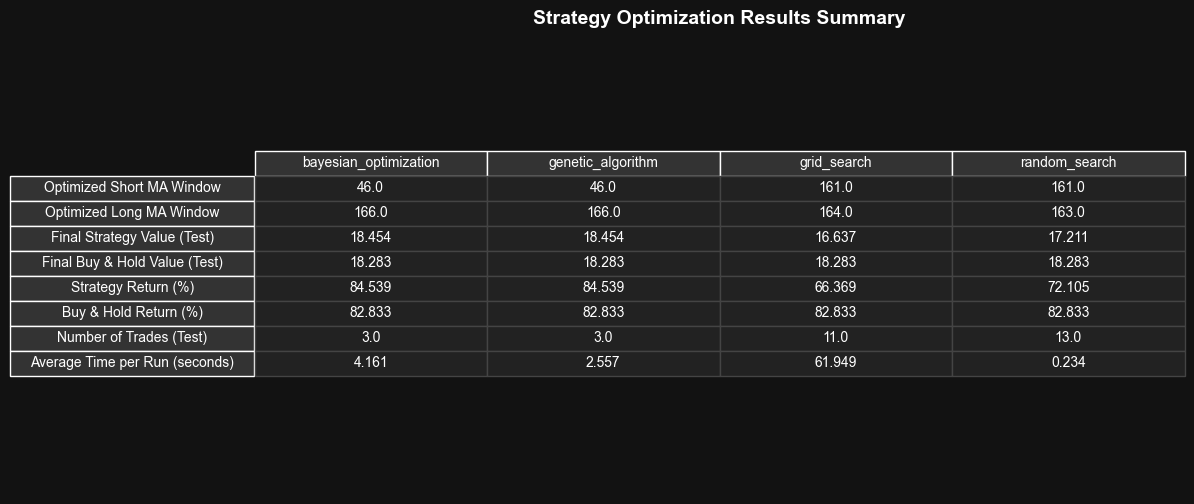

In [75]:
fig, ax = plt.subplots(figsize=(12, summary_metrics.shape[0]*0.5 + 2))
ax.axis('off')

# Dark figure background
fig.patch.set_facecolor('#121212')  # very dark gray/black

tbl = ax.table(cellText=summary_metrics.round(3).values,
               rowLabels=summary_metrics.index,
               colLabels=summary_metrics.columns,
               cellLoc='center', rowLoc='center',
               loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)

for (row, col), cell in tbl.get_celld().items():
    # Headers (row=0) and row labels (col=-1)
    if row == 0 or col == -1:
        cell.set_facecolor('#333333')  # dark gray header background
        cell.get_text().set_color('white')  # white text
        cell.set_edgecolor('white')
    else:
        cell.set_facecolor('#222222')  # slightly darker cell background
        cell.get_text().set_color('white')  # white text
        cell.set_edgecolor('#444444')  # lighter border

plt.title("Strategy Optimization Results Summary", fontsize=14, weight='bold', color='white')
plt.show()

### Visual Comparison of Final Portfolio Values

The final portfolio value achieved by each optimization method on the test set is critical as it reflects the actual growth potential of the trading strategy when tuned by that method. Here we plot these values side-by-side.

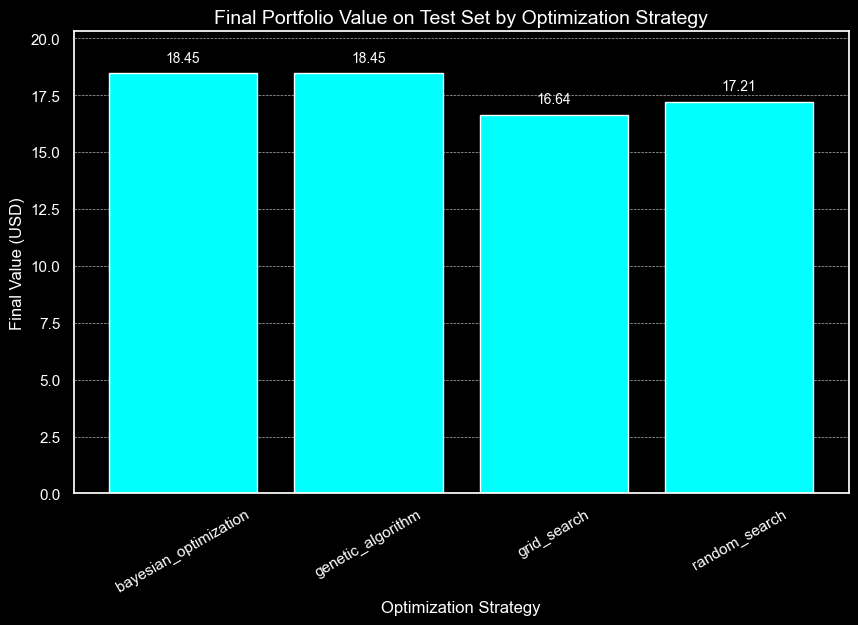

In [76]:
# Bar plot of Final Strategy Value (Test)
final_values = summary_metrics.loc["Final Strategy Value (Test)"]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(final_values.index, final_values.values, color='cyan', edgecolor='white')
ax.set_title("Final Portfolio Value on Test Set by Optimization Strategy", fontsize=14)
ax.set_ylabel("Final Value (USD)")
ax.set_xlabel("Optimization Strategy")
ax.set_ylim(0, final_values.max() * 1.1)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + final_values.max()*0.02,
            f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=30)
ax.grid(axis='x', visible=False)  # explicitly disable vertical grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

### Strategy Return vs Buy & Hold Return

Comparing the percentage returns of the optimized strategies against a simple buy & hold baseline gives insight into the effectiveness of parameter tuning. This plot shows both returns side-by-side for each method.

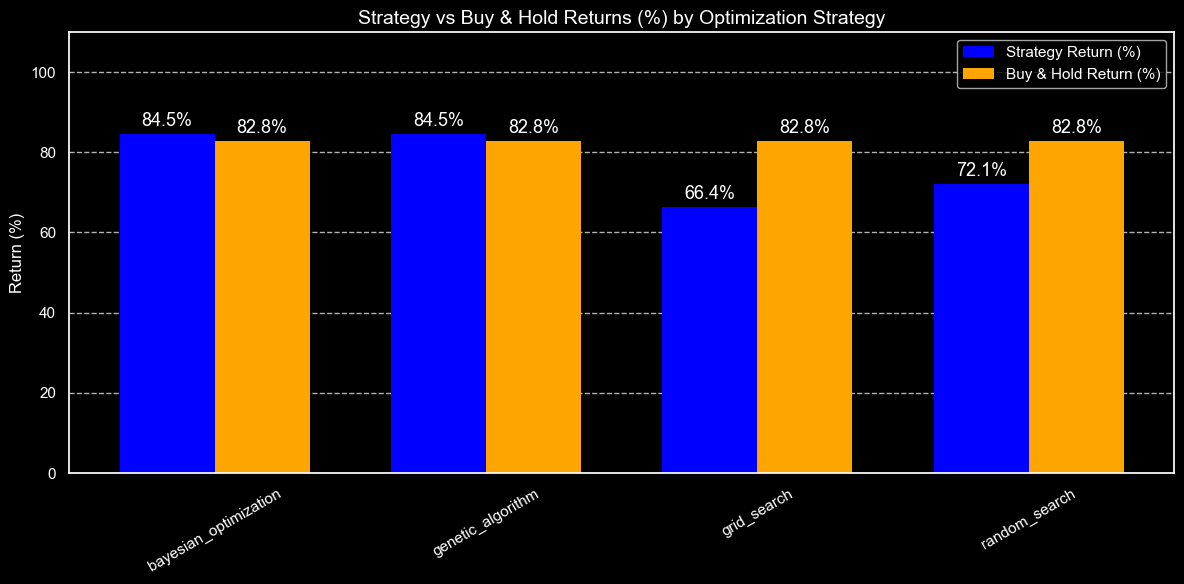

In [80]:
# Plot Strategy Return (%) vs Buy & Hold Return (%)
strategy_returns = summary_metrics.loc["Strategy Return (%)"]
buyhold_returns = summary_metrics.loc["Buy & Hold Return (%)"]

x = range(len(strategy_returns))

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], strategy_returns.values, width,
               label="Strategy Return (%)", color='blue', edgecolor='none')
bars2 = ax.bar([i + width/2 for i in x], buyhold_returns.values, width,
               label="Buy & Hold Return (%)", color='orange', edgecolor='none')

# Adjust y-limit for space above bars
max_y = max(strategy_returns.max(), buyhold_returns.max())
ax.set_ylim(0, max_y * 1.3)  # 15% headroom above the tallest bar

ax.set_title("Strategy vs Buy & Hold Returns (%) by Optimization Strategy", fontsize=14)
ax.set_ylabel("Return (%)")
ax.set_xticks(x)
ax.set_xticklabels(strategy_returns.index, rotation=30)
ax.legend()
ax.grid(axis='x', visible=False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar values
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom', fontsize=13)

plt.tight_layout()
plt.savefig("strategy_vs_buyhold_returns.png", dpi=300, bbox_inches='tight')
plt.show()

### Number of Trades Executed

Trading frequency is a critical factor affecting costs and risk. Here we compare how many trades each optimized strategy triggered during the test period.

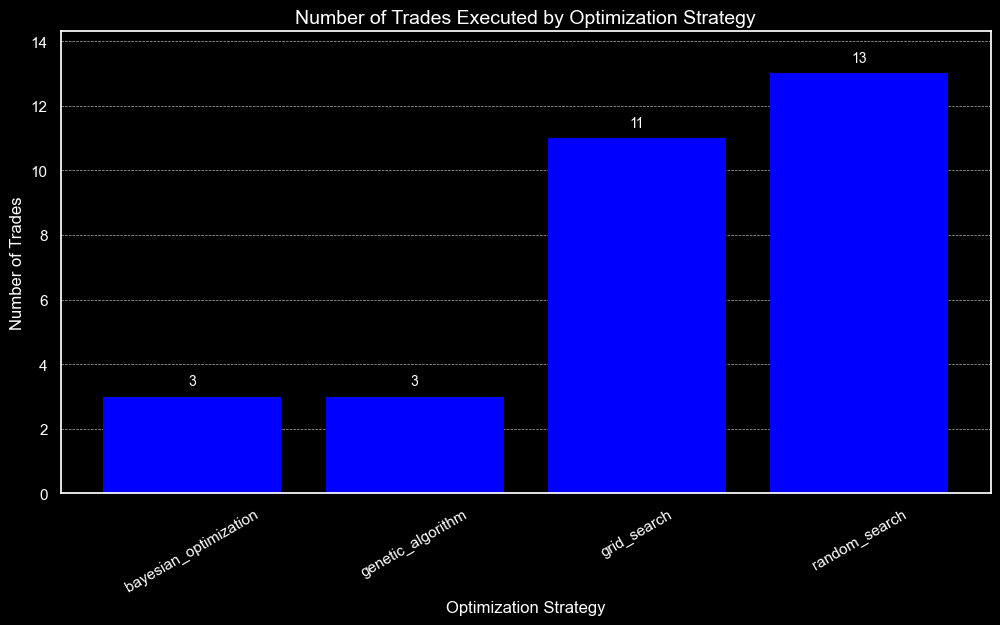

In [84]:
num_trades = summary_metrics.loc["Number of Trades (Test)"]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(num_trades.index, num_trades.values, color='blue', edgecolor='none')
ax.set_title("Number of Trades Executed by Optimization Strategy", fontsize=14)
ax.set_ylabel("Number of Trades")
ax.set_xlabel("Optimization Strategy")
ax.set_ylim(0, num_trades.max() * 1.1)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + num_trades.max()*0.02,
            f"{int(height)}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=30)
ax.grid(axis='x', visible=False)  # explicitly disable vertical grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("number_of_trades.png", dpi=300, bbox_inches='tight')
plt.show()

### Average Time per Run

Optimization runtime is key for practical usability. This plot compares how long each method takes per run, providing a measure of efficiency.

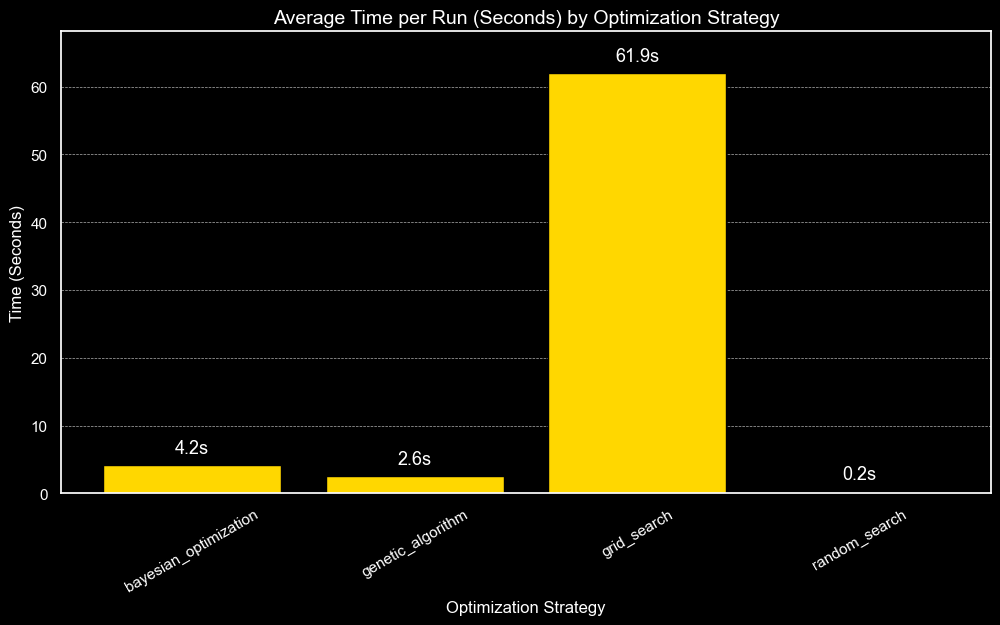

In [86]:
times = summary_metrics.loc["Average Time per Run (seconds)"]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(times.index, times.values, color='gold', edgecolor='black')
ax.set_title("Average Time per Run (Seconds) by Optimization Strategy", fontsize=14)
ax.set_ylabel("Time (Seconds)")
ax.set_xlabel("Optimization Strategy")
ax.set_ylim(0, times.max() * 1.1)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + times.max()*0.02,
            f"{height:.1f}s", ha='center', va='bottom', fontsize=13)

plt.xticks(rotation=30)
ax.grid(axis='x', visible=False)  # explicitly disable vertical grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig("average_time_per_run.png", dpi=300, bbox_inches='tight')
plt.show()